In [17]:
df <- read.csv("resulting_data.csv", row.names="FirstColumn")

In [18]:
#Get the colnames from the dataframe and remove the .rawcounts

col_names <- colnames(df)

new_col_names <- gsub("\\.rawcounts$", "", col_names)

colnames(df) <- new_col_names

In [19]:
df

,SMOC2_normal_1,SMOC2_normal_3,SMOC2_normal_4,SMOC2_UUO_1,SMOC2_UUO_2,SMOC2_UUO_3,SMOC2_UUO_4,WT_normal_1,WT_normal_2,WT_normal_3,WT_UUO_1,WT_UUO_2,WT_UUO_3,WT_UUO_4
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSMUSG00000000001,1959,1868,2226,4508,3627,3042,3137,2751,2254,3310,4190,3938,3568,3708
ENSMUSG00000000003,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000000028,31,44,45,163,160,171,147,36,48,71,154,128,162,118
ENSMUSG00000000031,1,3,1,634,174,48,20,2,4,6,521,9,22,5
ENSMUSG00000000037,5,7,9,21,28,29,22,11,12,13,48,32,35,33
ENSMUSG00000000049,0,1,1,5,6,3,14,6,0,0,6,5,3,6
ENSMUSG00000000056,958,1269,1153,1159,789,803,1046,1428,931,1571,975,1306,1151,889
ENSMUSG00000000058,759,619,837,1302,1345,1146,1132,1372,1040,1232,1615,1442,1459,1439
ENSMUSG00000000078,713,659,773,6405,5710,5317,5633,988,709,1369,7045,6921,6355,7830


In [20]:
#The Biological replicates

condition <- c(rep("SMOC2_normal", 3), rep("SMOC2_UUO", 4), rep("WT_normal", 3), rep("WT_UUO", 4))

In [21]:
condition_metadata <- as.data.frame(condition)
rownames(condition_metadata) <- colnames(df)

In [22]:
condition_metadata

,condition
,<chr>
SMOC2_normal_1,SMOC2_normal
SMOC2_normal_3,SMOC2_normal
SMOC2_normal_4,SMOC2_normal
SMOC2_UUO_1,SMOC2_UUO
SMOC2_UUO_2,SMOC2_UUO
SMOC2_UUO_3,SMOC2_UUO
SMOC2_UUO_4,SMOC2_UUO
WT_normal_1,WT_normal
WT_normal_2,WT_normal


In [2]:
#Creating a DESeq2 object
install.packages("DESeq2")
install.packages("dplyr")
library("DESeq2")
library("tidyverse")

Warning message:
“package ‘DESeq2’ is not available (for R version 3.5.1)”Warning message:
“dependency ‘lifecycle’ is not available”also installing the dependencies ‘cli’, ‘pillar’, ‘rlang’, ‘tibble’, ‘tidyselect’, ‘vctrs’

Warning message in install.packages("dplyr"):
“installation of package ‘cli’ had non-zero exit status”Warning message in install.packages("dplyr"):
“installation of package ‘rlang’ had non-zero exit status”Warning message in install.packages("dplyr"):
“installation of package ‘vctrs’ had non-zero exit status”Warning message in install.packages("dplyr"):
“installation of package ‘pillar’ had non-zero exit status”Warning message in install.packages("dplyr"):
“installation of package ‘tidyselect’ had non-zero exit status”Warning message in install.packages("dplyr"):
“installation of package ‘tibble’ had non-zero exit status”Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”Updating HTML index of packages in '.Librar

ERROR: Error in library("DESeq2"): there is no package called ‘DESeq2’


In [24]:
dds <- DESeqDataSetFromMatrix(countData =df, colData = condition_metadata, design = ~condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [25]:
dds
dds <- DESeq(dds)

class: DESeqDataSet 
dim: 47728 14 
metadata(1): version
assays(1): counts
rownames(47728): ENSMUSG00000000001 ENSMUSG00000000003 ...
  ENSMUSG00000109577 ENSMUSG00000109578
rowData names(0):
colnames(14): SMOC2_normal_1 SMOC2_normal_3 ... WT_UUO_3 WT_UUO_4
colData names(1): condition

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [26]:
normalized_counts <- counts(dds, normalized= T)

In [27]:
head(normalized_counts)

,SMOC2_normal_1,SMOC2_normal_3,SMOC2_normal_4,SMOC2_UUO_1,SMOC2_UUO_2,SMOC2_UUO_3,SMOC2_UUO_4,WT_normal_1,WT_normal_2,WT_normal_3,WT_UUO_1,WT_UUO_2,WT_UUO_3,WT_UUO_4
ENSMUSG00000000001,2891.232646,2443.339073,2738.329035,3298.613720,3395.611915,2537.532959,3037.83597,2869.084561,2957.34934,3009.747251,3534.774010,3123.197038,2915.878545,3771.109127
ENSMUSG00000000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000000028,45.752022,57.551884,55.357056,119.271082,149.792640,142.642385,142.35317,37.545272,62.97816,64.559533,129.917708,101.515800,132.391347,120.008327
ENSMUSG00000000031,1.475872,3.923992,1.230157,463.913287,162.899496,40.039968,19.36778,2.085848,5.24818,5.455735,439.526792,7.137830,17.979072,5.085099
ENSMUSG00000000037,7.379358,9.155982,11.071411,15.366213,26.213712,24.190814,21.30456,11.472167,15.74454,11.820760,40.493831,25.378950,28.603069,33.561651
ENSMUSG00000000049,0.000000,1.307997,1.230157,3.658622,5.617224,2.502498,13.55744,6.257545,0.00000,0.000000,5.061729,3.965461,2.451692,6.102118


In [28]:
annotation <- read.csv("annotated_gene_name.csv",header = T, stringsAsFactors = F )
head(annotation)

,Gene.stable.ID,Gene.name,Gene.type
,<chr>,<chr>,<chr>
1,ENSMUSG00000064336,mt-Tf,Mt_tRNA
2,ENSMUSG00000064337,mt-Rnr1,Mt_rRNA
3,ENSMUSG00000064338,mt-Tv,Mt_tRNA
4,ENSMUSG00000064339,mt-Rnr2,Mt_rRNA
5,ENSMUSG00000064340,mt-Tl1,Mt_tRNA
6,ENSMUSG00000064341,mt-Nd1,protein_coding


In [29]:
annotation

Gene.stable.ID,Gene.name,Gene.type
<chr>,<chr>,<chr>
ENSMUSG00000064336,mt-Tf,Mt_tRNA
ENSMUSG00000064337,mt-Rnr1,Mt_rRNA
ENSMUSG00000064338,mt-Tv,Mt_tRNA
ENSMUSG00000064339,mt-Rnr2,Mt_rRNA
ENSMUSG00000064340,mt-Tl1,Mt_tRNA
ENSMUSG00000064341,mt-Nd1,protein_coding
ENSMUSG00000064342,mt-Ti,Mt_tRNA
ENSMUSG00000064343,mt-Tq,Mt_tRNA
ENSMUSG00000064344,mt-Tm,Mt_tRNA


In [30]:
normalized_counts <- rownames_to_column(as.data.frame(normalized_counts), var = "ensembl_id")
normalized_counts
annotated_data <- right_join(annotation, normalized_counts, by = c("Gene.stable.ID" = "ensembl_id"))
head(annotated_data)

ensembl_id,SMOC2_normal_1,SMOC2_normal_3,SMOC2_normal_4,SMOC2_UUO_1,SMOC2_UUO_2,SMOC2_UUO_3,SMOC2_UUO_4,WT_normal_1,WT_normal_2,WT_normal_3,WT_UUO_1,WT_UUO_2,WT_UUO_3,WT_UUO_4
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000000001,2891.232646,2443.339073,2738.329035,3298.6137203,3395.611915,2537.532959,3037.8359749,2869.084561,2957.34934,3009.747251,3534.774010,3123.1970381,2915.878545,3771.109127
ENSMUSG00000000003,0.000000,0.000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.000000,0.00000,0.000000,0.000000,0.0000000,0.000000,0.000000
ENSMUSG00000000028,45.752022,57.551884,55.357056,119.2710817,149.792640,142.642385,142.3531681,37.545272,62.97816,64.559533,129.917708,101.5158001,132.391347,120.008327
ENSMUSG00000000031,1.475872,3.923992,1.230157,463.9132872,162.899496,40.039968,19.3677780,2.085848,5.24818,5.455735,439.526792,7.1378297,17.979072,5.085099
ENSMUSG00000000037,7.379358,9.155982,11.071411,15.3662130,26.213712,24.190814,21.3045558,11.472167,15.74454,11.820760,40.493831,25.3789500,28.603069,33.561651
ENSMUSG00000000049,0.000000,1.307997,1.230157,3.6586221,5.617224,2.502498,13.5574446,6.257545,0.00000,0.000000,5.061729,3.9654609,2.451692,6.102118
ENSMUSG00000000056,1413.885081,1659.848653,1418.370789,848.0686118,738.664957,669.835294,1012.9347879,1489.295802,1221.51386,1428.493333,822.530945,1035.7783981,940.632345,904.130532
ENSMUSG00000000058,1120.186615,809.650367,1029.641241,952.7052049,1259.194382,955.954231,1096.2162332,1430.892046,1364.52676,1120.244294,1362.448694,1143.6389358,1192.339349,1463.491379
ENSMUSG00000000078,1052.296517,861.970262,950.911206,4686.6949598,5345.724850,4435.260598,5454.9346658,1030.409141,930.23988,1244.816915,5943.313342,5488.9910363,5193.500044,7963.264419


,Gene.stable.ID,Gene.name,Gene.type,SMOC2_normal_1,SMOC2_normal_3,SMOC2_normal_4,SMOC2_UUO_1,SMOC2_UUO_2,SMOC2_UUO_3,SMOC2_UUO_4,WT_normal_1,WT_normal_2,WT_normal_3,WT_UUO_1,WT_UUO_2,WT_UUO_3,WT_UUO_4
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSMUSG00000064336,mt-Tf,Mt_tRNA,0.00,0.00,0.00,0.000,0.000,0.00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000,0.000,8.172305e-01,0.000
2,ENSMUSG00000064337,mt-Rnr1,Mt_rRNA,16153.42,20972.43,25314.17,7045.043,6647.985,9951.60,9.791380e+03,15771.10,3.219758e+04,1.520513e+04,8578.787,9312.488,3.206567e+04,7949.026
3,ENSMUSG00000064338,mt-Tv,Mt_tRNA,0.00,0.00,0.00,0.000,0.000,0.00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000,0.000,0.000000e+00,0.000
4,ENSMUSG00000064339,mt-Rnr2,Mt_rRNA,25666.88,29184.04,35124.67,8629.226,7917.477,12061.21,1.323788e+04,23242.61,4.365698e+04,2.138557e+04,10900.433,10856.639,5.157542e+04,10779.392
5,ENSMUSG00000064340,mt-Tl1,Mt_tRNA,0.00,0.00,0.00,0.000,0.000,0.00,9.683889e-01,0.00,1.312045e+00,9.092892e-01,0.000,0.000,0.000000e+00,0.000
6,ENSMUSG00000064341,mt-Nd1,protein_coding,427208.77,466210.81,388879.63,121884.070,141082.198,176118.30,1.503830e+05,368796.78,4.443778e+05,3.666490e+05,125318.284,183170.193,1.042345e+05,140063.956


In [31]:
write.csv(annotated_data, file = "gene_annotated_normalized_counts.csv")

In [32]:
vsd <- vst(dds, blind = TRUE)

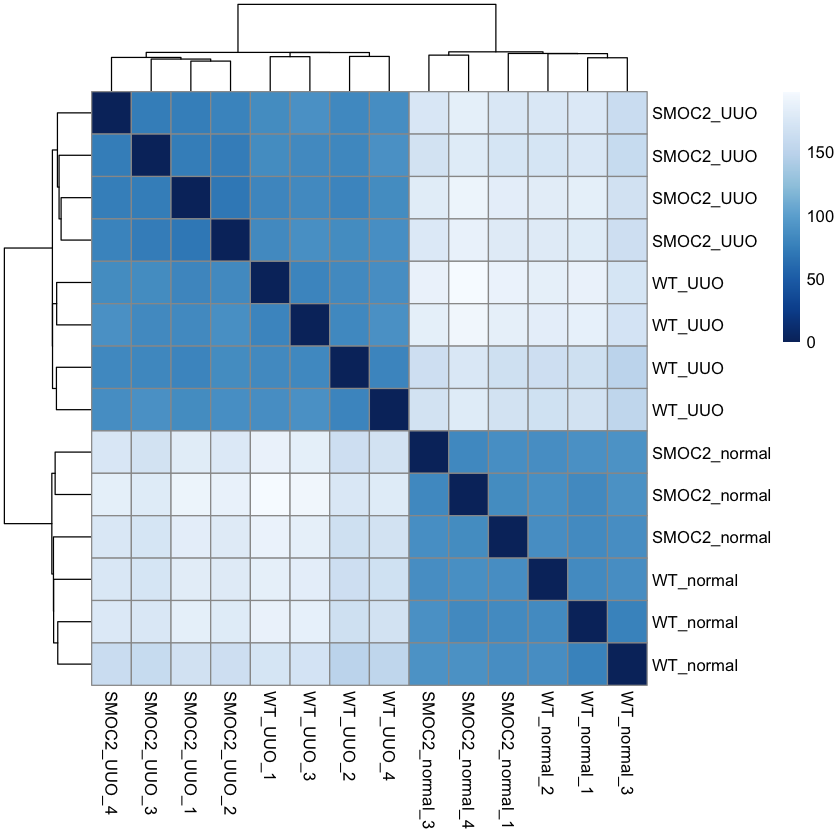

In [33]:
plotDists = function (vsd.obj) {
  sampleDists <- dist(t(assay(vsd.obj)))
  sampleDistMatrix <- as.matrix( sampleDists )
  rownames(sampleDistMatrix) <- paste( vsd.obj$condition )
  colors <- colorRampPalette( rev(RColorBrewer::brewer.pal(9, "Blues")) )(255)
  pheatmap::pheatmap(sampleDistMatrix,
           clustering_distance_rows = sampleDists,
           clustering_distance_cols = sampleDists,
           col = colors)
}
plotDists(vsd)

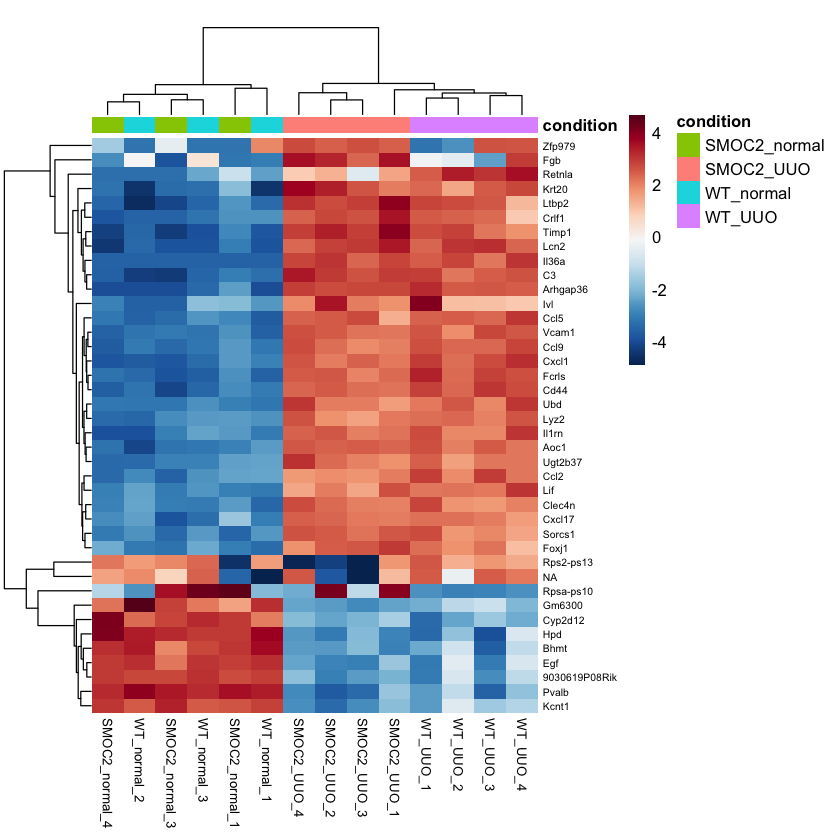

In [34]:
variable_gene_heatmap <- function (vsd.obj, num_genes = 500, annotation, title = "") {
  brewer_palette <- "RdBu"
  # Ramp the color in order to get the scale.
  ramp <- colorRampPalette( RColorBrewer::brewer.pal(11, brewer_palette))
  mr <- ramp(256)[256:1]
  # get the stabilized counts from the vsd object
  stabilized_counts <- assay(vsd.obj)
  # calculate the variances by row(gene) to find out which genes are the most variable across the samples.
  row_variances <- rowVars(stabilized_counts)
  # get the top most variable genes
  top_variable_genes <- stabilized_counts[order(row_variances, decreasing=T)[1:num_genes],]
  # subtract out the means from each row, leaving the variances for each gene
  top_variable_genes <- top_variable_genes - rowMeans(top_variable_genes, na.rm=T)
  # replace the ensembl ids with the gene names
  gene_names <- annotation$Gene.name[match(rownames(top_variable_genes), annotation$Gene.stable.ID)]
  rownames(top_variable_genes) <- gene_names
  # reconstruct colData without sizeFactors for heatmap labeling
  coldata <- as.data.frame(vsd.obj@colData)
  coldata$sizeFactor <- NULL
  # draw heatmap using pheatmap
  pheatmap::pheatmap(top_variable_genes, color = mr, annotation_col = coldata, fontsize_col = 8, fontsize_row = 250/num_genes, border_color = NA, main = title)
}

variable_gene_heatmap(vsd, num_genes = 30, annotation = annotation)

In [ ]:
#Perform PCA